In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [22]:
df = pd.read_csv('athlete_events.csv')

In [23]:
def alterPessoa(pessa):
    dist = {"M":0 , "F":1 }
    return dist[pessa]

In [24]:
def alterMedal(medal):
    dist = {0: 3, "Bronze": 3,"Silver": 2, "Gold": 1}
    return dist[medal]

In [25]:
df['Sex'] =  df['Sex'].apply(alterPessoa)

In [26]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,0,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,0,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,0,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,0,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,1,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [47]:
df['Sport']

0            Basketball
1                  Judo
2              Football
3            Tug-Of-War
4         Speed Skating
              ...      
271111             Luge
271112      Ski Jumping
271113      Ski Jumping
271114        Bobsleigh
271115        Bobsleigh
Name: Sport, Length: 271116, dtype: object

In [27]:
df['Medal'].fillna(value= 0, inplace = True)

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_11192\2635084067.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medal'].fillna(value= 0, inplace = True)


In [28]:
df['Medal'] =  df['Medal'].apply(alterMedal)

In [29]:
import seaborn as sns

<Axes: xlabel='Medal', ylabel='Count'>

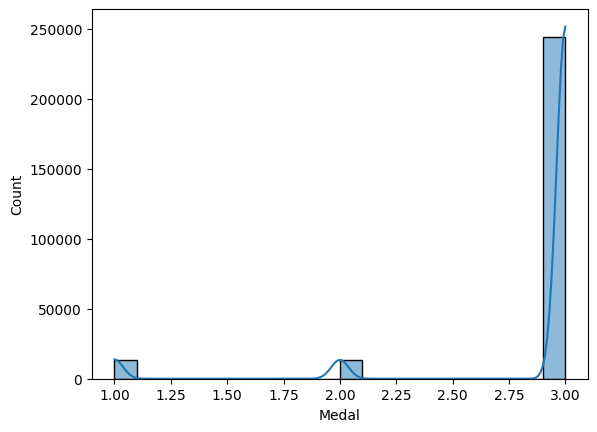

In [30]:
sns.histplot(data = df, x = "Medal", kde = True)

In [31]:
X = np.array(df['Sex'])

In [32]:
X = X.reshape(-1, 1)

In [33]:
y = df["Medal"]

In [34]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state= 42)

In [35]:
modelo = LinearRegression()

In [36]:
modelo.fit(X_treino, y_treino)

LinearRegression()

In [46]:
score = modelo.score(X_teste, y_teste)
print(f'Coeficiente R^2: {score:.20f}')

Coeficiente R^2: 0.00000844716523429323
